## Дополнительное задание 1

In [1]:
from math import log
from bitarray import bitarray
import random
import numpy as np
import string
from tqdm import tqdm_notebook

In [2]:
L = np.linspace(10, 100, 11)
simple = [109, 223, 311, 431, 547, 653, 769, 877, 919, 997]

In [3]:
def rand_str(n, rs):
    np.random.RandomState(seed=rs)
    s = ''.join([np.random.choice(list(set(string.ascii_lowercase))) for i in range(n)])
    return s

In [4]:
def hash_int(x, a=112, b=22, m=2048):
    return (a*x + b) % m

In [5]:
def poly_hash(s, p, x=31):
    h = 0
    for j in range(len(s)-1, -1, -1):
        h = (h * x + ord(s[j]) + p) % p
    return h

#### Рассчитаем число коллизий для всех пар L и p, 10 экспериментов на каждую пару

In [8]:
all_results = dict()

for p in simple:
    cols = dict()
    for l in tqdm_notebook(L):
        results = list()
        for i in range(10):
            hashes = set()
            strings = [rand_str(int(l), int(l)+p+i) for k in range(100)]
            for s in strings:
                h = hash_int(poly_hash(s, p))
                hashes.add(h)
            results.append(100 - len(hashes))            
        cols[l] = results
    all_results[p] = cols

In [10]:
import matplotlib.pyplot as plt

#### Зависимость FPR от p

In [37]:
y = list()
e = list()

for p in all_results:
    n_cols = list()
    for l in all_results[p]:
        for el in all_results[p][l]:      
            n_cols.append(el*2/(100*99))
    y.append(np.mean(n_cols))
    e.append(np.std(n_cols))    

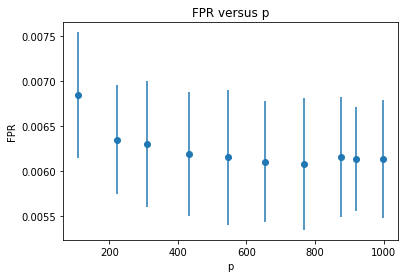

In [38]:
plt.errorbar(simple, y, e, linestyle='None', marker='o')
plt.xlabel('p')
plt.ylabel('FPR')
plt.title('FPR versus p')
plt.show()


#### Зависимость FPR от L

In [40]:
y = list()
e = list()

for l in L:
    for p in all_results:
        n_cols = list()
        for el in all_results[p][int(l)]:      
            n_cols.append(el*2/(100*99))
    y.append(np.mean(n_cols))
    e.append(np.std(n_cols))    

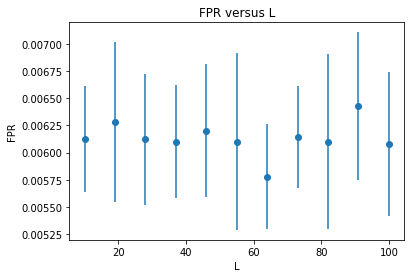

In [41]:
plt.errorbar(L, y, e, linestyle='None', marker='o')
plt.xlabel('L')
plt.ylabel('FPR')
plt.title('FPR versus L')
plt.show()